#### 1. I want to make sure my Plate ID is a string. Can't lose the leading zeroes!
#### 2. I don't think anyone's car was built in 0AD. Discard the '0's as NaN.
#### 3. I want the dates to be dates! Read the read_csv documentation to find out how to make pandas automatically parse dates.

In [1]:
import pandas as pd
#import pandas as pd

In [2]:
import datetime
import datetime as dt
# import datetime
# import datetime as dt

In [3]:
dt.datetime.strptime('08/04/2013', '%m/%d/%Y')
datetime.datetime(2013, 8, 4, 0, 0)

parser = lambda date: pd.datetime.strptime(date, '%m/%d/%Y')

In [4]:
!head -n 10000 violations.csv > small-violations.csv

In [5]:
df = pd.read_csv("small-violations.csv", na_values= {'Vehicle Year': ['0']}, parse_dates=[4], date_parser=parser, dtype=str)


In [6]:
df.tail(20)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
9979,1349994406,GEF7027,NY,PAS,2013-07-15,52,SDN,NISSA,X,0,...,GRY,0,2003,-,0,NaN,NaN,NaN,NaN,NaN
9980,1349994571,EUX4225,NY,PAS,2013-07-21,40,SDN,NISSA,P,0,...,BLUE,0,2003,-,0,NaN,NaN,NaN,NaN,NaN
9981,1349994716,GHF9746,NY,PAS,2013-08-10,40,SDN,HONDA,P,0,...,BLACK,0,2013,-,2,NaN,NaN,NaN,NaN,NaN
9982,1349994741,HX55885,NY,PAS,2013-08-09,70,SDN,VOLKS,P,21290,...,GOLD,0,1974,-,0,NaN,NaN,NaN,NaN,NaN
9983,1349994753,HX55885,NY,PAS,2013-08-09,71,SDN,VOLKS,P,21290,...,GOLD,0,1974,-,0,NaN,NaN,NaN,NaN,NaN
9984,1349994807,TME33R,NJ,PAS,2013-08-09,78,TRLR,NaN,P,0,...,WHITE,0,NaN,-,0,NaN,NaN,NaN,NaN,NaN
9985,1349994819,98166JT,99,COM,2013-08-09,78,VAN,FORD,P,0,...,WHITE,0,2008,-,0,NaN,NaN,NaN,NaN,NaN
9986,1349995514,EUE8098,99,PAS,2013-07-23,27,SUBN,MERCU,P,0,...,GRN,0,1999,-,0,NaN,NaN,NaN,NaN,NaN
9987,1349995526,54726MC,NY,COM,2013-07-23,78,VAN,CHEVR,P,0,...,WH,0,2008,-,0,NaN,NaN,NaN,NaN,NaN
9988,1349995538,7AB6161,MD,PAS,2013-07-23,78,SUBN,GMC,P,0,...,GRY,0,NaN,-,0,NaN,NaN,NaN,NaN,NaN


#### 4. "Date first observed" is a pretty weird column, but it seems like it has a date hiding inside. Using a function with .apply, transform the string (e.g. "20140324") into a Python date. Make the 0's show up as NaN.

In [7]:
df['Date First Observed'].value_counts()

0           9573
20130722      24
20130731      23
20130802      21
20130730      19
20130812      18
20130809      16
20130724      14
20130720      13
20130718      13
20130805      12
20130813      12
20130814      11
20130811      11
20130801      11
20130810      11
20130807      10
20130725      10
20130803      10
20130726      10
20130729       9
20130806       9
20130723       9
20130717       9
20130719       9
20130721       8
20130712       8
20130804       8
20130727       7
20130808       6
            ... 
20130820       4
20130822       2
20130709       2
20130825       2
20130816       2
20130715       2
20130624       1
20130708       1
20130629       1
20130713       1
20130824       1
20140512       1
20130610       1
20130609       1
20130622       1
20130628       1
20150711       1
20310801       1
20130819       1
20130714       1
20130818       1
20140812       1
20130604       1
20130823       1
20130701       1
20130630       1
20270727       1
20310803      

In [8]:
import dateutil.parser

In [9]:
def first_observed_function(x):
    try:
        x= str(x)
        print("NaN")
        if x == '0':
            return np.nan
        else:
            print("transforming...")
            date_clean = dateutil.parser.parse(x)
            return date_clean.strftime("%Y-%d-%m")
    except:
        return None

In [10]:
first_observed_function('20130731')

NaN
transforming...


'2013-31-07'

In [11]:
df['Clean Date First Observed']= df['Date First Observed'].apply(first_observed_function)

NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
transforming...
NaN
transforming...
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
transforming...
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
transforming...
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
transforming...
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
transforming...
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
transforming...
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
transforming...
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN


In [12]:
df['Clean Date First Observed'].value_counts()

2013-22-07    24
2013-31-07    23
2013-02-08    21
2013-30-07    19
2013-12-08    18
2013-09-08    16
2013-24-07    14
2013-18-07    13
2013-20-07    13
2013-05-08    12
2013-13-08    12
2013-01-08    11
2013-10-08    11
2013-14-08    11
2013-11-08    11
2013-26-07    10
2013-07-08    10
2013-03-08    10
2013-25-07    10
2013-06-08     9
2013-23-07     9
2013-17-07     9
2013-29-07     9
2013-19-07     9
2013-21-07     8
2013-04-08     8
2013-12-07     8
2013-27-07     7
2013-11-07     6
2013-28-07     6
              ..
2013-10-07     4
2013-22-08     2
2013-15-07     2
2013-09-07     2
2013-25-08     2
2013-16-08     2
2013-29-06     1
2013-18-08     1
2013-01-07     1
2013-24-06     1
2031-03-08     1
2013-23-08     1
2015-11-07     1
2013-14-07     1
2013-26-08     1
2013-09-06     1
2013-13-07     1
2014-12-08     1
2014-12-05     1
2013-24-08     1
2013-08-07     1
2013-22-06     1
2013-03-07     1
2013-19-08     1
2013-10-06     1
2013-28-06     1
2013-04-06     1
2027-27-07    

#### 5. Violation time" is... not a time. Make it a time

In [13]:
df['Violation Time']

0       0752A
1       1240P
2       1243P
3       0232P
4       1239P
5       0617P
6       0741P
7       0425A
8       0437A
9       0839A
10      0845A
11      0907A
12      0514P
13      0656P
14      1145P
15      0546P
16      1142A
17      0724A
18      0758A
19      0736A
20      0847A
21      1120A
22      1020A
23      0324P
24      1018A
25      0743A
26      0850A
27      0915A
28      1023A
29      1120A
        ...  
9969    1251P
9970    0645P
9971    0230A
9972    0315A
9973    0230A
9974    1213P
9975    0830A
9976    0305A
9977    0855A
9978    1021A
9979    0330A
9980    0524P
9981    0505P
9982    1018P
9983    1018P
9984    0215A
9985    0130A
9986    1020P
9987    1000P
9988    1000P
9989    1030P
9990    1115A
9991    0842A
9992    1150A
9993    1141A
9994    1140A
9995    0315P
9996    0310P
9997    1026A
9998    0148P
Name: Violation Time, dtype: object

In [14]:
def violation_time_transformed(x):
    try:
        hour = x[0:2]
        minutes = x[2:4]
        pam= x[4]
        time= hour + ":" + minutes + " " + pam + 'm'
        changed_time = dateutil.parser.parse(time)
        return changed_time.strftime("%H:%M%p")
    except:
        return None

In [15]:
df['New Violation Time']= df['Violation Time'].apply(violation_time_transformed)

In [16]:
df['New Violation Time'].head(20)

0     07:52AM
1     12:40PM
2     12:43PM
3     14:32PM
4     12:39PM
5     18:17PM
6     19:41PM
7     04:25AM
8     04:37AM
9     08:39AM
10    08:45AM
11    09:07AM
12    17:14PM
13    18:56PM
14    23:45PM
15    17:46PM
16    11:42AM
17    07:24AM
18    07:58AM
19    07:36AM
Name: New Violation Time, dtype: object

#### 6. There sure are a lot of colors of cars, too bad so many of them are the same. Make "BLK" and "BLACK", "WT" and "WHITE", and any other combinations that you notice.

In [17]:
df['Vehicle Color'].value_counts()

WHITE    1753
BLACK     896
GY        637
BLUE      607
GRAY      553
RED       525
WH        513
BLK       487
BK        450
SILVE     392
GREY      363
BROWN     305
WHT       299
GREEN     268
BL        192
TAN       173
GRY       167
GOLD      116
BR        116
YELLO     114
RD        104
SILVR      83
WT         62
GR         57
GRN        51
TN         45
ORANG      41
BRN        34
SILV       34
SIL        29
         ... 
Y           1
SLIVE       1
TEAL        1
BIRG        1
NAVY/       1
VAN         1
BWN         1
IL          1
CHAMP       1
RUST        1
MAR         1
BT          1
YW/BL       1
OTHER       1
D.BLU       1
BG          1
METBL       1
WWHIT       1
BLE         1
MARON       1
WOOD        1
WYH         1
BLACL       1
PINK        1
VLACK       1
BLCK        1
PEARL       1
GR/YE       1
BKE         1
BUR         1
Name: Vehicle Color, dtype: int64

In [18]:
def color(color):
    if (color == "BK") or (color == "BL"):
            return 'BLACK'
    if (color == "WHT") or (color == "WT") or (color == 'WH'):
            return 'WHITE'
    else:
            return color

#example        
color('BK'), color('WHT'), color('BL'), color('WT'), color('WH')

('BLACK', 'WHITE', 'BLACK', 'WHITE', 'WHITE')

In [19]:
df['B&W Clean Vehicle Color'] = df['Vehicle Color'].apply(color)

In [20]:
df['B&W Clean Vehicle Color'].value_counts()

WHITE    2627
BLACK    1538
GY        637
BLUE      607
GRAY      553
RED       525
BLK       487
SILVE     392
GREY      363
BROWN     305
GREEN     268
TAN       173
GRY       167
BR        116
GOLD      116
YELLO     114
RD        104
SILVR      83
GR         57
GRN        51
TN         45
ORANG      41
BRN        34
SILV       34
SIL        29
BLU        25
GN         23
MAROO      20
SL         18
PURPL      15
         ... 
PEARL       1
SLIVE       1
SW          1
B           1
BEGE        1
YLW         1
LIGHT       1
B;L         1
BU          1
SROWN       1
NLACK       1
D.BLU       1
YW/BL       1
MAR         1
RUST        1
BLE         1
WWHIT       1
METBL       1
BG          1
OTHER       1
BT          1
CHAMP       1
IL          1
BWN         1
VAN         1
BIRG        1
BKE         1
PUR         1
TEAL        1
BUR         1
Name: B&W Clean Vehicle Color, dtype: int64

#### 7. Join the data with the Parking Violations Code dataset from the NYC Open Data site

In [21]:
!head -n 10000 DOF_Parking_Violation_Codes.csv > small_DOF_Parking_Violation_Codes.csv

In [22]:
violations_data = pd.read_csv("small_DOF_Parking_Violation_Codes.csv")

In [23]:
violations_data.head(2)

,CODE,DEFINITION,Manhattan 96th St. & below,All Other Areas
0,10,"Stopping, standing or parking where a sign, st...",$115,$115
1,11,Hotel Loading/Unloading: Standing or parking w...,$115,$115


In [24]:
type(violations_data['CODE'])

pandas.core.series.Series

In [25]:
violations_data['CODE'].value_counts()

63       1
39       1
11       1
05       1
83       1
37-38    1
67       1
10       1
48       1
25       1
50       1
32       1
19       1
47       1
65       1
42       1
07       1
99       1
20       1
85       1
12       1
82       1
94       1
06       1
89       1
18       1
61       1
66       1
96       1
04       1
        ..
78       1
26       1
84       1
64       1
57       1
55       1
16       1
77       1
23       1
58       1
34       1
08       1
79       1
98       1
24       1
52       1
35       1
13       1
40       1
53       1
86       1
73       1
27       1
62       1
69       1
33       1
43       1
59       1
97       1
56       1
Name: CODE, dtype: int64

In [26]:
def transform_code(x):
    try:
        new_code = x[0:2]
        return new_code
    except:
        return None

In [27]:
single_code = violations_data['CODE'].apply(transform_code)

In [28]:
violations_data['int CODE'] = single_code.astype(int)

In [29]:
violations_data['int CODE'].dtype #now is an integer

dtype('int64')

In [146]:
violations_data.head(129)

,CODE,DEFINITION,Manhattan 96th St. & below,All Other Areas,int CODE
0,10,"Stopping, standing or parking where a sign, st...",$115,$115,10
1,11,Hotel Loading/Unloading: Standing or parking w...,$115,$115,11
2,12,Snow Emergency: Standing or parking where stan...,$95,$95,12
3,13,Taxi Stand: Standing or parking where standing...,$115,$115,13
4,14,General No Standing: Standing or parking where...,$115,$115,14
5,16,Truck Loading/Unloading: Standing or parking w...,$95,$95,16
6,17,Authorized Vehicles Only: Standing or parking ...,$95,$95,17
7,18,Bus Lane: Standing or parking where standing i...,$115,$115,18
8,19,Bus Stop: Standing or parking where standing i...,$115,$115,19
9,20,General No Parking: No parking where parking i...,$65,$60,20


In [39]:
#I need to do this same process to the df['Violation Code'] because to transform it to a INT
old_df = df["Violation Code"].apply(transform_code)

In [151]:
df.head(10)

0    46
1    46
2    46
3    46
4    41
5    14
6    14
7    24
8    24
9    24
Name: Violation Code, dtype: object

In [152]:
df['Violation Code 2'] = old_df.astype(int)

In [155]:
#Merging the two data sets
new_df= df.merge(violations_data, left_on="Violation Code 2", right_on="int CODE")

In [200]:
new_df.head(40)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,New Violation Time,B&W Clean Vehicle Color,Violation Code 2,CODE,DEFINITION,Manhattan 96th St. & below,All Other Areas,int CODE,All Other Areas 2,Manhattan 96th St. & below 2
0,1283294138,GBB9093,NY,PAS,2013-08-04,46,SUBN,AUDI,P,37250,...,07:52AM,GY,46,46,Standing or parking on the roadway side of a v...,$115,$115,46,115.0,115.0
1,1283294151,62416MB,NY,COM,2013-08-04,46,VAN,FORD,P,37290,...,12:40PM,WHITE,46,46,Standing or parking on the roadway side of a v...,$115,$115,46,115.0,115.0
2,1283294163,78755JZ,NY,COM,2013-08-05,46,P-U,CHEVR,P,37030,...,12:43PM,NaN,46,46,Standing or parking on the roadway side of a v...,$115,$115,46,115.0,115.0
3,1283294175,63009MA,NY,COM,2013-08-05,46,VAN,FORD,P,37270,...,14:32PM,WHITE,46,46,Standing or parking on the roadway side of a v...,$115,$115,46,115.0,115.0
4,1290834349,429J6JM,NY,COM,2013-07-23,46,DELV,INTER,P,0,...,10:37AM,BR,46,46,Standing or parking on the roadway side of a v...,$115,$115,46,115.0,115.0
5,1290834374,42587JW,NY,COM,2013-07-30,46,DELV,FORD,P,65590,...,11:19AM,YELL,46,46,Standing or parking on the roadway side of a v...,$115,$115,46,115.0,115.0
6,1291521665,YANKYJAM,NY,PAS,2013-07-02,46,SDN,BMW,F,5430,...,19:42PM,BLK,46,46,Standing or parking on the roadway side of a v...,$115,$115,46,115.0,115.0
7,1293030739,GHG2484,NY,PAS,2013-08-11,46,NaN,FORD,P,26440,...,01:30AM,BLACK,46,46,Standing or parking on the roadway side of a v...,$115,$115,46,115.0,115.0
8,1293100924,64195MC,NY,COM,2013-06-20,46,VAN,WHITE,F,81330,...,15:44PM,WHITE,46,46,Standing or parking on the roadway side of a v...,$115,$115,46,115.0,115.0
9,1293101151,54100JA,NY,COM,2013-07-05,46,P-U,FORD,F,21140,...,13:15PM,NaN,46,46,Standing or parking on the roadway side of a v...,$115,$115,46,115.0,115.0


#### 8. How much money did NYC make off of parking violations?

In [157]:
new_df['All Other Areas'].value_counts()

$115                                      4015
$45                                       2414
$65                                       1333
$60                                       1078
$95                                        650
$165                                       138
$180                                        82
vary                                        74
$35                                         50
$200 (Heavy Tow, plus violation fine)        6
2nd Offense - $265\n2nd Offense - $515       5
Name: All Other Areas, dtype: int64

In [158]:
new_df[ 'Manhattan\xa0 96th St. & below'].value_counts()

$65                                        4746
$115                                       4015
$95                                         650
$165                                        138
$60                                         129
$180                                         82
vary                                         74
100\n(Regular Tow, plus violation fine)       6
1st Offense - $265\n2nd Offense - $515        5
$115                                          1
Name: Manhattan  96th St. & below, dtype: int64

In [159]:
#First, I will transfrom all values into integers
def money_transformer(money_string):
    if money_string == '200 (Heavy Tow plus violation fine)':
        string_only = money_string[:3]
        return int(string_only)
    if money_string == '100\n(Regular Tow, plus violation fine)':
        string_only = money_string[:3]
        return int(string_only)
    try:
        return int(money_string.replace("$","").replace(",",""))
    except:
        return None

In [188]:
new_df['All Other Areas 2'] = new_df['All Other Areas'].apply(money_transformer)

In [161]:
new_df['Manhattan\xa0 96th St. & below 2'] = new_df['Manhattan\xa0 96th St. & below'].apply(money_transformer)

In [189]:
outcome1 = new_df['All Other Areas 2'].sum()
outcome2 = new_df['Manhattan\xa0 96th St. & below 2'].sum()

In [190]:
print("NYC makes between","$", outcome1, "US dollars and","$", outcome2, "US dollars of parking violations")
#PS. Data set has been cut to 10000 rows for memory saving reasons. Output would be considerably higher with the complete DF.

NYC makes between $ 822710.0 US dollars and $ 877950.0 US dollars of parking violations


#### 9. What's the most lucrative kind of parking violation? The most frequent?

In [169]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

The most frequent is the infraction 21, followed by infraction 46 and 14


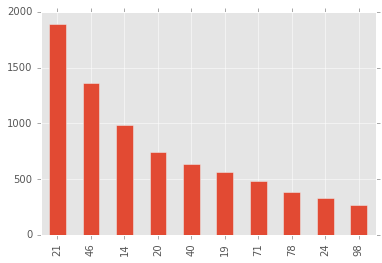

In [218]:
new_df['Violation Code 2'].value_counts().head(10).plot.bar()
print("The most frequent is the infraction 21, followed by infraction 46 and 14")

In [219]:
print("this is how the top 3 are defined:")
new_df.groupby('CODE')['DEFINITION'].value_counts().sort_values(ascending=False).head(3)


this is how the top 3 are defined


CODE  DEFINITION                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
21    Street Cleaning: No parking where parking is not allowed by sign, street marking or traffic control device.                                                                                                                              

In [221]:
#Looking for the most lucrative
violations_data.sort_values(by='CODE').head(46)

,CODE,DEFINITION,Manhattan 96th St. & below,All Other Areas,int CODE
78,04,Vehicles parked illegally south of Houston Str...,$115,NaN,4
79,05,Failure to make a right turn from a bus lane.,$115,$115,5
80,06,Parking a tractor-trailer on a residential str...,1st Offense - $265\n2nd Offense - $515,2nd Offense - $265\n2nd Offense - $515,6
81,07,Vehicles photographed going through a red ligh...,$50,$50,7
82,08,Vehicle idling in a restricted area.,$115,$115,8
83,09,Blocking an Intersection: Obstructing traffic ...,$115,$115,9
0,10,"Stopping, standing or parking where a sign, st...",$115,$115,10
1,11,Hotel Loading/Unloading: Standing or parking w...,$115,$115,11
2,12,Snow Emergency: Standing or parking where stan...,$95,$95,12
3,13,Taxi Stand: Standing or parking where standing...,$115,$115,13


In [238]:
new_df['Violation Code 2'].value_counts().head(3)

21    1894
46    1366
14     987
Name: Violation Code 2, dtype: int64

In [243]:
#21 cost $65, 46 cost $115, 14 cost $115
def money_new(money_str):
    if money_str == 1894:
        return money_str * 65
    if money_str == 1366:
        return money_str * 115
    if money_str == 987:
        return money_str * 115

In [242]:
print("For al the 21 infractions the city has made", money_new(1894))
print("For al the 46 infractions the city has made", money_new(1366))
print("For al the 14 infractions the city has made", money_new(987))

print("Seems that infraction 46 is the most lucrative")
 

For al the 21 infractions the city has made 123110
For al the 46 infractions the city has made 157090
For al the 14 infractions the city has made 113505
Seems that infraction 46 is the most lucrative


#### 10. New Jersey has bad drivers, but does it have bad parkers, too? How much money does NYC make off of all non-New York vehicles?

In [277]:
new_df.groupby('Registration State')['All Other Areas 2'].sum().sort_values(ascending=False).head(10)

Registration State
NY    547900.0
NJ     76780.0
PA     47880.0
99     19850.0
CT     15870.0
VA     14955.0
FL     14315.0
MA      9705.0
IL      9405.0
TN      7380.0
Name: All Other Areas 2, dtype: float64

In [285]:
print('The city has made $274810 of the non newyorkers')
NY_fines= new_df.groupby('Registration State')['All Other Areas 2'].sum().sort_values(ascending=False).head(1)
outcome1 - NY_fines

The city has made $274810 of the non newyorkers


Registration State
NY    274810.0
Name: All Other Areas 2, dtype: float64

#### 11. Make a chart of the top few

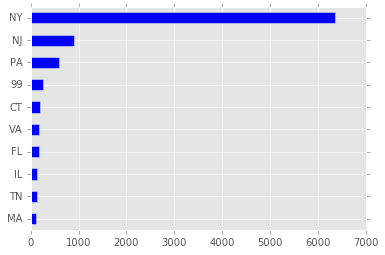

In [289]:
new_df['Registration State'].value_counts().sort_values().tail(10).plot.barh(color= 'Blue')

#### 12. What time of day do people usually get their tickets? You can break the day up into several blocks - for example 12am-6am, 6am-12pm, 12pm-6pm,6pm-12am.

In [292]:
new_df['New Violation Time'].head(10)

0    07:52AM
1    12:40PM
2    12:43PM
3    14:32PM
4    10:37AM
5    11:19AM
6    19:42PM
7    01:30AM
8    15:44PM
9    13:15PM
Name: New Violation Time, dtype: object

In [304]:
def hour_transformer(x):
    try:
        time = int(x[:2])
        if time  <= 6:
            return '12am-6am'
        elif time <= 12:
            return '6am-12pm'
        elif time <= 18:
            return '12pm-6pm'
        elif time <= 24:
            return '6pm-12am'
        else:
            pass
    except:
        pass

In [305]:
day_time = new_df['New Violation Time'].apply(hour_transformer)

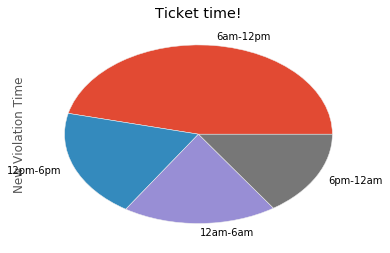

In [310]:
day_time.value_counts().plot.pie(title='Ticket time!')

#### 13. What's the average ticket cost in NYC?¶

In [314]:
new_df['All Other Areas 2'].mean()

84.294057377049185

#### 14. Make a graph of the number of tickets per day.

In [319]:
new_df['Issue Date'].describe()

count                    9846
unique                    141
top       2013-07-30 00:00:00
freq                      433
first     2000-03-14 00:00:00
last      2053-08-02 00:00:00
Name: Issue Date, dtype: object

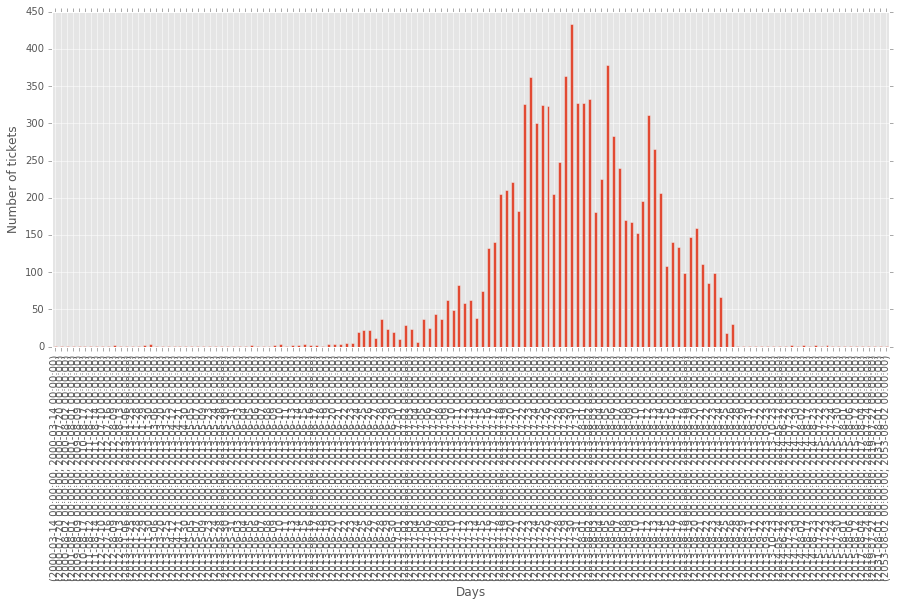

In [394]:
new_df.groupby('Issue Date')['Issue Date'].value_counts(sort=False).plot.bar(figsize=(15, 6))
plt.ylabel('Number of tickets')
plt.xlabel('Days')
#it seems like all the data is concentrated 
#only in a few years

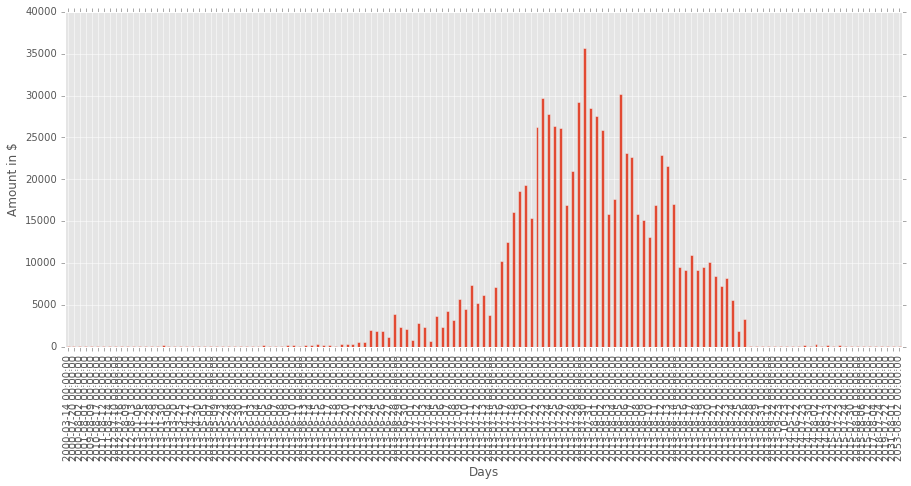

In [395]:
new_df.groupby('Issue Date')['All Other Areas 2'].sum().plot(kind="bar", figsize=(15, 6))
plt.ylabel('Amount in $')
plt.xlabel('Days')

#### 16. Manually construct a dataframe out of https://dmv.ny.gov/statistic/2015licinforce-web.pdf (only NYC boroughts - bronx, queens, manhattan, staten island, brooklyn), having columns for borough name, abbreviation, and number of licensed drivers.

In [396]:
#Still havent figure out how :( 